In [1]:
import sys
sys.path.append('C:/Users/farah.houdroge/Documents/GitHub/atomica/') # modify to local path to atomica
import atomica as at
import numpy as np
import utils as ut
import os
if not os.path.exists('results'): os.makedirs('results')
if not os.path.exists('figs'): os.makedirs('figs')
'''
Script to optimize spending given a budget.
'''

'\nScript to optimize spending given a budget.\n'

In [2]:
facility_code = 'mt-darwin_hosp_ZW' # specify facility code
facility_name = 'Mt Darwin District Hospital, Zimbabwe' # specify facility name

In [3]:
# Atomica project definition
P = at.Project(framework='files/carbomica_framework.xlsx', databook='files/carbomica_databook.xlsx',do_run=False)

In [4]:
P.settings.sim_dt    = 1 # simulation timestep
P.settings.sim_start = 2010 # simulation start year
P.settings.sim_end   = 2030 # simulation end year

In [5]:
# Load program and define variables for program runs
progset = P.load_progbook('files/carbomica_progbook_{}.xlsx'.format(facility_code))

In [6]:
start_year = 2024 # programs start year

In [7]:
# Baseline spending
instructions = at.ProgramInstructions(alloc=P.progsets[0], start_year=start_year)

In [8]:
# Adjustments (spending constraint for each program)
adjustments = [at.SpendingAdjustment(prog, start_year, 'abs', 0.0, np.inf) for prog in progset.programs.keys()]

In [9]:
# Measurables (objective function: minimize total emissions)
measurables = [at.MinimizeMeasurable('total_emissions',start_year)]

In [10]:
# Loop over budgets
budgets = [2e6, 5e6, 10e6]
results_optimized = []

In [11]:
for budget in budgets:
    constraints = at.TotalSpendConstraint(total_spend=budget, t=start_year) # constraint on total spending

    # Run optimization
    optimization = at.Optimization(name='default', maxiters=100,
                                   adjustments=adjustments, measurables=measurables, constraints=constraints)
    optimized_instructions = at.optimize(P, optimization, P.parsets[0],P.progsets[0], instructions=instructions)
    result_optimized = P.run_sim(P.parsets[0],P.progsets[0], progset_instructions=optimized_instructions)

    # Compile results
    opt_name = '${}M'.format(budget/1e6)
    result_optimized.name = opt_name
    results_optimized.append(result_optimized)

    step=1 choice=12, par=4, pm=1.0, origval=1e-10, newval=9e-11
     step 1 (0.0 s) ++ (orig:56.288 | best:56.288 | new:56.285 | diff:-0.0024358)
    step=2 choice=7, par=7, pm=0.0, origval=1e-10, newval=1.1000000000000001e-10
     step 2 (0.0 s) ++ (orig:56.288 | best:56.285 | new:56.285 | diff:-0.000039241)
    step=3 choice=12, par=4, pm=1.0, origval=9e-11, newval=6.999999999999999e-11
     step 3 (0.1 s) ++ (orig:56.288 | best:56.285 | new:56.280 | diff:-0.0049974)
    step=4 choice=9, par=1, pm=1.0, origval=1e-10, newval=9e-11
     step 4 (0.1 s) ++ (orig:56.288 | best:56.280 | new:56.278 | diff:-0.0025961)
    step=5 choice=4, par=4, pm=0.0, origval=6.999999999999999e-11, newval=8e-11
     step 5 (0.1 s) -- (orig:56.288 | best:56.278 | new:56.280 | diff:0.0025961)
    step=6 choice=12, par=4, pm=1.0, origval=6.999999999999999e-11, newval=2.999999999999999e-11
     step 6 (0.3 s) ++ (orig:56.288 | best:56.278 | new:56.266 | diff:-0.011096)
    step=7 choice=12, par=4, pm=1.0, ori

    step=51 choice=11, par=3, pm=1.0, origval=1e-10, newval=9.500000000000001e-11
     step 51 (1.8 s) -- (orig:56.288 | best:56.186 | new:56.187 | diff:0.00011460)
    step=52 choice=7, par=7, pm=0.0, origval=1.1000000000000001e-10, newval=1.15e-10
     step 52 (1.8 s) -- (orig:56.288 | best:56.186 | new:56.187 | diff:0.00069729)
    step=53 choice=6, par=6, pm=0.0, origval=1.7000000000000003e-10, newval=1.7250000000000002e-10
     step 53 (1.9 s) -- (orig:56.288 | best:56.186 | new:56.187 | diff:0.00050377)
    step=54 choice=4, par=4, pm=0.0, origval=0.0, newval=1.2500000000000001e-12
     step 54 (1.9 s) -- (orig:56.288 | best:56.186 | new:56.187 | diff:0.00053859)
    step=55 choice=11, par=3, pm=1.0, origval=1e-10, newval=9.75e-11
     step 55 (1.9 s) -- (orig:56.288 | best:56.186 | new:56.187 | diff:0.000057087)
    step=56 choice=14, par=6, pm=1.0, origval=1.7000000000000003e-10, newval=1.6500000000000002e-10
     step 56 (2.0 s) -- (orig:56.288 | best:56.186 | new:56.189 | dif

     step 7 (0.2 s) -- (orig:56.038 | best:56.018 | new:56.023 | diff:0.0049890)
    step=8 choice=7, par=7, pm=0.0, origval=1.1000000000000001e-10, newval=1.3000000000000002e-10
     step 8 (0.3 s) ++ (orig:56.038 | best:56.018 | new:56.014 | diff:-0.0038563)
    step=9 choice=7, par=7, pm=0.0, origval=1.3000000000000002e-10, newval=1.7000000000000003e-10
     step 9 (0.3 s) ++ (orig:56.038 | best:56.014 | new:56.010 | diff:-0.0042001)
    step=10 choice=2, par=2, pm=0.0, origval=2.5000000000000007e-10, newval=4.100000000000001e-10
     step 10 (0.4 s) -- (orig:56.038 | best:56.010 | new:56.019 | diff:0.0095048)
    step=11 choice=10, par=2, pm=1.0, origval=2.5000000000000007e-10, newval=2.4000000000000005e-10
     step 11 (0.4 s) ++ (orig:56.038 | best:56.010 | new:56.009 | diff:-0.00069404)
    step=12 choice=2, par=2, pm=0.0, origval=2.4000000000000005e-10, newval=3.2000000000000003e-10
     step 12 (0.4 s) -- (orig:56.038 | best:56.009 | new:56.014 | diff:0.0051957)
    step=13 ch

    step=55 choice=6, par=6, pm=0.0, origval=1.1000000000000001e-10, newval=1.3000000000000002e-10
     step 55 (1.8 s) ++ (orig:56.038 | best:55.949 | new:55.938 | diff:-0.011384)
    step=56 choice=9, par=1, pm=1.0, origval=9e-11, newval=6.999999999999999e-11
     step 56 (1.8 s) ++ (orig:56.038 | best:55.938 | new:55.932 | diff:-0.0062289)
    step=57 choice=15, par=7, pm=1.0, origval=4.900000000000001e-10, newval=4.850000000000001e-10
     step 57 (1.8 s) -- (orig:56.038 | best:55.932 | new:55.932 | diff:0.00041529)
    step=58 choice=9, par=1, pm=1.0, origval=6.999999999999999e-11, newval=2.999999999999999e-11
     step 58 (1.8 s) ++ (orig:56.038 | best:55.932 | new:55.923 | diff:-0.0089558)
    step=59 choice=15, par=7, pm=1.0, origval=4.900000000000001e-10, newval=4.875e-10
     step 59 (1.9 s) ++ (orig:56.038 | best:55.923 | new:55.922 | diff:-0.00042459)
    step=60 choice=9, par=1, pm=1.0, origval=2.999999999999999e-11, newval=0.0
     step 60 (1.9 s) ++ (orig:56.038 | best:5

    step=2 choice=14, par=6, pm=1.0, origval=1e-10, newval=9e-11
     step 2 (0.0 s) ++ (orig:55.776 | best:55.769 | new:55.763 | diff:-0.0057117)
    step=3 choice=6, par=6, pm=0.0, origval=9e-11, newval=1e-10
     step 3 (0.1 s) -- (orig:55.776 | best:55.763 | new:55.769 | diff:0.0057117)
    step=4 choice=0, par=0, pm=0.0, origval=1.1000000000000001e-10, newval=1.3000000000000002e-10
     step 4 (0.1 s) ++ (orig:55.776 | best:55.763 | new:55.749 | diff:-0.014130)
    step=5 choice=9, par=1, pm=1.0, origval=1e-10, newval=9e-11
     step 5 (0.1 s) ++ (orig:55.776 | best:55.749 | new:55.743 | diff:-0.0058862)
    step=6 choice=10, par=2, pm=1.0, origval=1e-10, newval=9e-11
     step 6 (0.2 s) -- (orig:55.776 | best:55.743 | new:55.747 | diff:0.0039667)
    step=7 choice=0, par=0, pm=0.0, origval=1.3000000000000002e-10, newval=1.7000000000000003e-10
     step 7 (0.2 s) ++ (orig:55.776 | best:55.743 | new:55.717 | diff:-0.026322)
    step=8 choice=7, par=7, pm=0.0, origval=1e-10, newval=

    step=50 choice=2, par=2, pm=0.0, origval=2.5000000000000007e-10, newval=2.900000000000001e-10
     step 50 (1.5 s) -- (orig:55.776 | best:55.451 | new:55.453 | diff:0.0018498)
    step=51 choice=1, par=1, pm=0.0, origval=0.0, newval=5.0000000000000005e-12
     step 51 (1.5 s) -- (orig:55.776 | best:55.451 | new:55.452 | diff:0.0012118)
    step=52 choice=7, par=7, pm=0.0, origval=4.100000000000001e-10, newval=4.3000000000000007e-10
     step 52 (1.6 s) -- (orig:55.776 | best:55.451 | new:55.453 | diff:0.0016517)
    step=53 choice=2, par=2, pm=0.0, origval=2.5000000000000007e-10, newval=2.7000000000000005e-10
     step 53 (1.6 s) ++ (orig:55.776 | best:55.451 | new:55.451 | diff:-0.00030094)
    step=54 choice=2, par=2, pm=0.0, origval=2.7000000000000005e-10, newval=3.1000000000000007e-10
     step 54 (1.6 s) -- (orig:55.776 | best:55.451 | new:55.455 | diff:0.0042614)
    step=55 choice=5, par=5, pm=0.0, origval=1e-10, newval=1.1000000000000001e-10
     step 55 (1.7 s) -- (orig:55

     step 96 (2.9 s) ++ (orig:55.776 | best:55.416 | new:55.414 | diff:-0.0025261)
    step=97 choice=8, par=0, pm=1.0, origval=9.800000000000003e-10, newval=9.000000000000003e-10
     step 97 (2.9 s) -- (orig:55.776 | best:55.414 | new:55.419 | diff:0.0048309)
    step=98 choice=2, par=2, pm=0.0, origval=3.6500000000000003e-10, newval=3.7500000000000005e-10
     step 98 (3.0 s) -- (orig:55.776 | best:55.414 | new:55.415 | diff:0.0013020)
    step=99 choice=6, par=6, pm=0.0, origval=9.25e-11, newval=9.75e-11
     step 99 (3.0 s) ++ (orig:55.776 | best:55.414 | new:55.409 | diff:-0.0050337)
    step=100 choice=8, par=0, pm=1.0, origval=9.800000000000003e-10, newval=9.400000000000003e-10
     step 100 (3.0 s) -- (orig:55.776 | best:55.409 | new:55.409 | diff:0.00065167)
===  Maximum iterations reached (100 steps, orig: 55.776 | best: 55.409 | ratio: 0.99341) ===
Elapsed time for running "default": 0.0495s


<Figure size 432x288 with 0 Axes>

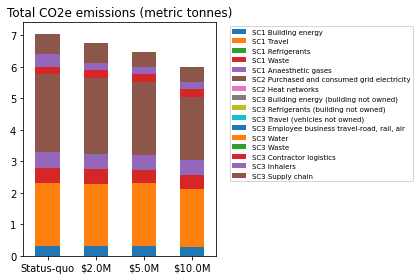

Emissions results saved: results/emissions_optimized_mt-darwin_hosp_ZW.xlsx
Emissions bar plots saved: figs/emissions_optimized_mt-darwin_hosp_ZW.xlsx


,SC1 Building energy,SC1 Travel,SC1 Refrigerants,SC1 Waste,SC1 Anaesthetic gases,SC2 Purchased and consumed grid electricity,SC2 Heat networks,SC3 Building energy (building not owned),SC3 Refrigerants (building not owned),SC3 Travel (vehicles not owned),"SC3 Employee business travel-road, rail, air",SC3 Water,SC3 Waste,SC3 Contractor logistics,SC3 Inhalers,SC3 Supply chain
Status-quo,0.31,2.0,0.0,0.49,0.51,2.45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.39,0.66
$2.0M,0.308176,1.976471,0.0,0.461176,0.4875,2.421176,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.234,0.627971
$5.0M,0.30055,2.0,0.0,0.435499,0.480062,2.300628,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.234,0.466792
$10.0M,0.280216,1.856863,0.0,0.444363,0.4725,1.979216,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.240882,0.464669


In [12]:
# Calculate emissions
ut.calc_emissions(results_optimized,start_year,facility_code,file_name='emissions_optimized_{}'.format(facility_code))

<Figure size 432x288 with 0 Axes>

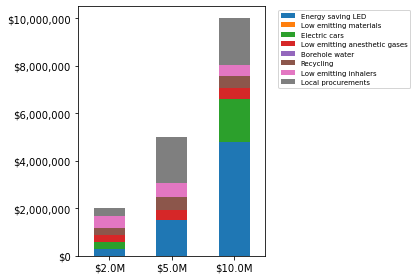

Allocation results saved: results/allocation_optimized_mt-darwin_hosp_ZW.xlsx
Allocation bar plots saved: figs/allocation_optimized_mt-darwin_hosp_ZW.xlsx


,Energy saving LED,Low emitting materials,Electric cars,Low emitting anesthetic gases,Borehole water,Recycling,Low emitting inhalers,Local procurements
$2.0M,294117.647059,0.0,294117.647059,294117.647059,0.0,294117.647059,500000.0,323529.411765
$5.0M,1524201.853759,0.0,0.0,391349.124614,0.0,556127.703399,576725.025747,1951596.292482
$10.0M,4803921.568627,0.0,1789215.686275,490196.078431,0.0,465686.27451,477941.176471,1973039.215686


In [13]:
# Calculate allocation
ut.calc_allocation(results_optimized,file_name='allocation_optimized_{}'.format(facility_code)) # allocation